In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd "/content/drive/MyDrive/RA/RA/RIS"

/content/drive/MyDrive/RA/RA/RIS


### Set Working Directory

In [2]:
# Xavier cd
import os
working_directory = "/content/drive/MyDrive/STAR RIS/RIS"
os.chdir(working_directory)

In [2]:
import pandas as pd
import os
import random
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from logging import getLogger
import math
import itertools
import torch
from shutil import copyfile
import copy

from main import get_parser, main
from Packages import *
from Packages.Utils import utils as ut
from Packages.Utils import data_generation as dg

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/xaviermootoo/opt/anaconda3/envs/torch2_mps/lib/python3.10/site-packages/torch/_functorch/deprecated.py:62: UserWarning: We've integrated functorch into PyTorch. As the final step of the integration, functorch.grad is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use torch.func.grad instead; see the PyTorch 2.0 release notes and/or the torch.func migration guide for more details https://pytorch.org/docs/master/func.migrating.html
  warn_deprecated('grad')


### Step 1: Experiment & Learning Parameters
Tweak these parameters for training. Test cases:
* `exp_id`=1113 for `dataset_id` = 17. $P_{\text{max}} = 2$, and $r_{\text{min}} = 3$.
* `exp_id`=1114 for `dataset_id` = 15. $P_{\text{max}} = 5$, and $r_{\text{min}} = 2.5$.

In [10]:
model_path = '/home/mehrazin/Documents/NGWN/JUPNet/Pre_Trained'
arg = []

# experiment parameters
arg += ['--exp_id', '1113', # ID number of the folder to save models and logs (saved to 'Dumped' folder)
        '--env_seed', '1',
        '--load_model', 'False',
        '--eval_only', 'False',
        '--model_path', model_path,
        '--model_type', 'WTNet',
        '--dataset_id', '15', # Dataset that you will use to train on.
        '--data_preparation', 'False',
        '--debug', 'False',
        '--debug_id', '1',
        '--debug_train_samples', '2',
        '--debug_test_samples', '2',
        '--debug_common_samples', '2',
        '--debug_seed', '2',
        '--normalize', 'True',
        '--augment', 'False',
        '--device', 'cuda',
        '--pre_augment', 'False']

# learning hyperparameters
arg += ['--clip_grad_norm', '0',
        '--learning_rate', '0.0002',
        '--decay_rate', '0.99',
        '--weight_decay', '0.05',
        '--max_epoch', '2', # Number of epochs to train for
        '--epoch_size', '-1', # Number of examples used at each epoch (randomly sampled)
        '--batch_size', '100',
        '--optimizer', 'Adam']

args = get_parser()
args = args.parse_args(arg)

### Step 2: Model Parameters

In [11]:
config = Config(args)
config.project = True
config.proj_on = 1
config.gamma = 1
for k, v in [('lr_w', 0.1), ('lr_phi_t', 0.1), ('lr_phi_r', 0.1), ('lr_a', 0.1), ('momentum_var_t', 0.5), ('momentum_var_r', 0.5), ('momentum_w', 0.5), ('momentum_a', 0.5), ('num_iter', 100)]:
        config.train_params[k] = v
        config.test_params[k] = v
config.train_params['num_iter'] = 10
config.test_params['num_iter'] = 20
config.train_increase = 0
config.r_min = 2.5 # Configure for the dataset
config.mode1 = True
config.star = True # Select STAR-RIS or Normal RIS
config.model_id = 1
config.active_dnns = ['r']
config.init = []
config.p_bias = 2
config.P_max = 5 # Configure for the dataset
config.N = 64 # Configure for the dataset (default is 64, unless using special datasets)
N0_dbm = -170
config.N0 = (10**((N0_dbm - 30)/10))*180*1e3

config.check_name = 'checkpoint.pth'
config.eval_dtypes = ['test', 'valid']
for feature in ['exp_dir', 'device', 'model_type', 'normalize', 'epoch_size', 'N0', 'M', 'P_max']:
    print(getattr(config, feature))

/Users/xaviermootoo/Documents/VScode/STAR-RIS/Dumped/1113
cpu
WTNet
True
-1
1.8e-15
8
5


### Step 3. Run the Neural Network

In [13]:
main(config)

INFO - 11/18/23 20:08:45 - 0:00:00 - ============ Initialized logger ============
INFO - 11/18/23 20:08:45 - 0:00:00 - A_mode: A_init
                                     Dataset_dir: /Users/xaviermootoo/Documents/VScode/STAR-RIS/Datasets/Star/15
                                     K: 4
                                     M: 8
                                     N: 64
                                     N0: 1.8e-15
                                     P_max: 5
                                     P_mode: P_init
                                     active_dnns: ['r']
                                     augment: False
                                     batch_size: 100
                                     check_name: checkpoint.pth
                                     clip_grad_norm: 0.0
                                     command: python /Users/xaviermootoo/opt/anaconda3/envs/torch2_mps/lib/python3.10/site-packages/ipykernel_launcher.py --f=/Users/xaviermootoo/Library/Jupyter/run

seed set to 1


WARNING - 11/18/23 20:08:48 - 0:00:04 - Evaluator Updated!!
INFO - 11/18/23 20:08:49 - 0:00:04 - ============ Visualizer created-Save in /Users/xaviermootoo/Documents/VScode/STAR-RIS/Dumped/1113/run ============
INFO - 11/18/23 20:08:49 - 0:00:04 - ============ Starting epoch 19 ... ============
INFO - 11/18/23 20:09:03 - 0:00:18 -   17120 -   114.69 samples/s - LOSS: -20.7121 || RATE: 17.8049 || VIO:  0.0161 - vio LR: 2.0000e-04
INFO - 11/18/23 20:09:14 - 0:00:29 -   17140 -   175.73 samples/s - LOSS: -20.8528 || RATE: 17.9125 || VIO:  0.0143 - vio LR: 2.0000e-04
INFO - 11/18/23 20:09:25 - 0:00:40 -   17160 -   180.38 samples/s - LOSS: -20.9359 || RATE: 17.9718 || VIO:  0.0086 - vio LR: 2.0000e-04
INFO - 11/18/23 20:09:36 - 0:00:51 -   17180 -   175.49 samples/s - LOSS: -20.8025 || RATE: 17.8700 || VIO:  0.0176 - vio LR: 2.0000e-04
INFO - 11/18/23 20:09:48 - 0:01:03 -   17200 -   179.02 samples/s - LOSS: -20.8198 || RATE: 17.8767 || VIO:  0.0071 - vio LR: 2.0000e-04
INFO - 11/18/23 20

### Set the config

In [ ]:
config.legacy_datasets = False
config.reyleigh = True
config.dataset_id = str(3)
config.update()
# config.QoS[:] = 0.5
print(config.Dataset_dir)

### Load the data

In [ ]:
config.dataset_id = str(8256)
config.update()
config.batch_size = 10
df = create_data_loader(config, 'test')
da = next(iter(df))
h, g = to_cuda(config, da['H'], da['G'])
da = {}
da['H'] = h
da['G'] = g

In [ ]:
config.project = False
config.load_model = True
config.exp_id = 82565
config.P_max = 3
config.N = 256
config.r_min = 1
config.star = True
# set_seed(config)
# torch.cuda.empty_cache()
config.model_path = os.path.join(os.getcwd(), 'Dumped', str(config.exp_id), 'Model1', 'best_model_valid.pth')
model_a = build_model(config)
model_a.eval()

INFO - 11/07/23 00:03:26 - 0:18:03 - ============ Loading checkpoint ============
INFO - 11/07/23 00:03:26 - 0:18:03 - ============ Model loaded ============


WTNet(
  (tnet): TNet_star(
    (c1): Conv2d(8, 64, kernel_size=(4, 4), stride=(1, 1))
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (c2): Conv2d(64, 64, kernel_size=(4, 4), stride=(1, 1))
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (l1): Linear(in_features=32000, out_features=1024, bias=True)
    (bn3): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (l2): Linear(in_features=1024, out_features=256, bias=True)
    (l3): Linear(in_features=1024, out_features=256, bias=True)
    (l4): Linear(in_features=1024, out_features=256, bias=True)
    (d1): Dropout(p=0.1, inplace=False)
    (d2): Dropout(p=0.4, inplace=False)
  )
  (wnet): WNet(
    (l1): Linear(in_features=6144, out_features=100, bias=True)
    (bn1): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (l2): Linear(in_features=100, out_features=100, bias=True)
 

In [ ]:
def rate_vio_p(config, Data, var_t, var_r, w, **kwargs):
    W, Theta_t, Theta_r = get_W_Theta(config, w, var_t, var_r, **kwargs)
    R = rate(config, Data, Theta_t, Theta_r, W, users = True)
    diff = torch.exp(config.r_min - R + 1e-5) -1
    return diff.sum(-1)

In [ ]:
p_params = {}
for k, v in [('lr_w', 0.1), ('lr_phi_t', 1), ('lr_phi_r', 1), ('lr_a', 10), ('momentum_phi_t', 0.5), ('momentum_a', 0.5), ('momentum_phi_r', 0.5), ('momentum_w', 0.5), ('num_iter', 100)]:
                    p_params[k] = v
p_params['num_iter'] = 300
config.test_params = p_params

config.r_min = 1
# config.p_bias = 3
config.project = False
w, phi_t, phi_r, a = model_a(da)

In [ ]:
p_params = {}
for k, v in [('lr_w', 0.1), ('lr_phi_t', 0.1), ('lr_phi_r', 0.1), ('lr_a', 10), ('momentum_phi_t', 0.5), ('momentum_a', 0.5), ('momentum_phi_r', 0.5), ('momentum_w', 0.5), ('num_iter', 100)]:
                    p_params[k] = v
p_params['num_iter'] = 300
config.project = False
w, phi_t, phi_r, a = model_a(da)
with torch.no_grad():
    stats, w, phi_t, phi_r, a = project(config, p_params, da, w, phi_t, phi_r, a)

In [ ]:
stats['R'][-1]

25.9496596778634

In [ ]:
if config.star:
      W, Theta_t, Theta_r = get_W_Theta(config, w, phi_t, phi_r, a)
else:
      W, Theta_t, Theta_r = get_W_Theta(config, w, phi_t, phi_r)
R = rate(config, da, W, Theta_t, Theta_r, users = True)

if config.star:
    vio = rate_vio(config, da, w, phi_t, phi_r, a)
else:
    vio = rate_vio(config, da, w, phi_t, phi_r)

print(f'{config.Dataset_dir}   ---- {config.r_min}   ---- {config.P_max}  ---- Star: {config.star}  --- SR:{R.sum(-1).mean().item()} --- Vio:{vio.sum().item()}\
--- Vio(%): {(R<config.r_min).any(-1).sum().item()/100}')

C:\Users\mehrazin\Desktop\RA\Star\Datasets\Star\8256   ---- 1   ---- 3  ---- Star: True  --- SR:26.377904523602204 --- Vio:0.0--- Vio(%): 0.0


In [ ]:
vio.sum()

In [ ]:
vio_p

In [ ]:
(vio_p > 0).sum()/vio.shape[0]

In [ ]:
R.sum(-1).mean()

In [ ]:
R

## Random init

In [ ]:
from Packages.Models.model import project

In [ ]:
results = {}
config.N = 64
for d_id, N_id in [(832, 32),(8128, 128),(8256, 256)]:
    config.dataset_id = str(d_id)
    config.update()
    config.batch_size = 100
    # df = create_data_loader(config, 'test')
    # da = next(iter(df))
    config.N = N_id
    da = Data(config, 'test')
    results[str(d_id)] = {'Star':{}, 'Double':{}}
    for flag, key in [(True, 'Star'), (False, 'Double')]:
#         if flag:
#             continue
#         p_max = d_id%5 if d_id%5 != 0 else 5
#         r_min = 2+ 0.5*((d_id-6)//5)
        p_max = 3
        r_min = 2
        torch.manual_seed(1)
        config.star = flag
        config.P_max = p_max
        config.r_min = r_min
        if config.star:
            N = config.N
        else:
            N = config.N//2
        w_p = torch.zeros(config.batch_size, 2*config.M*config.K + 1).double()
        phi_t_p = torch.zeros(config.batch_size, N).double()
        phi_r_p = torch.zeros(config.batch_size, N).double()
        if config.star:
            a_p = torch.zeros(config.batch_size, N).double()

        p_params = {}
        for k, v in [('lr_w', 0.1), ('lr_phi_t', 0.1), ('lr_phi_r', 0.1), ('lr_a', 0.1), ('momentum_phi_t', 0.5), ('momentum_a', 0.5), ('momentum_phi_r', 0.5), ('momentum_w', 0.5), ('num_iter', 100)]:
                    p_params[k] = v
        p_params['num_iter'] = 300

        ti = []
        da_p = {}
        for i in range(config.batch_size):
            da_p = da[i]
            for k in da_p.keys():
                da_p[k] = da_p[k].unsqueeze(0)
            if config.star:
                N = config.N
            else:
                N = config.N//2
            phi_t = torch.rand(1, N).double()*2*torch.pi
            phi_r = torch.rand(1, N).double()*2*torch.pi
            if config.star:
                temp = torch.rand(1,N)
                a = torch.log(temp/(1-temp)).double()
            w = torch.randn(1, 2*config.K*config.M + 1).double()
            if config.star:
                with torch.no_grad():
                    s = time.time()
                    w, phi_t, phi_r, a = project(config, p_params, da_p, w, phi_t, phi_r, a)
                    e = time.time()
            else:
                with torch.no_grad():
                    s = time.time()
                    w, phi_t, phi_r = project(config, p_params, da_p, w, phi_t, phi_r)
                    e = time.time()
            ti.append(e - s)

            w_p[i, :] = w[0,:]
            phi_r_p[i,:] = phi_r[0,:]
            phi_t_p[i,:] = phi_t[0,:]
            if config.star:
                a_p[i,:] = a[0,:]
        Ti = sum(ti)/config.batch_size


        if config.star:
              W, Theta_t, Theta_r = get_W_Theta(config, w_p, phi_t_p, phi_r_p, a_p)
        else:
              W, Theta_t, Theta_r = get_W_Theta(config, w_p, phi_t_p, phi_r_p)
        R = rate(config, da[:config.batch_size], W, Theta_t, Theta_r, users = True)

        if config.star:
            vio = rate_vio(config, da[:config.batch_size], w_p, phi_t_p, phi_r_p, a_p)
        else:
            vio = rate_vio(config, da[:config.batch_size], w_p, phi_t_p, phi_r_p)

        print(f'{config.Dataset_dir}   ---- {config.r_min}   ---- {config.P_max}  ---- Star: {config.star}  --- SR:{R.sum(-1).mean().item()} --- Vio:{vio.sum().item()}\
        --- Vio(%): {(R<config.r_min).any(-1).sum().item()/100} --- Time: {Ti}')
        key = 'Star' if flag else 'Double'
        results[str(d_id)][key] = {'R': R.sum(-1).mean().item(), 'vio':vio.sum().item(), 'vio_percent': (R<config.r_min).any(-1).sum().item()/100, 'time_l': ti, 'time': Ti }
        #         results[str(d_id)][key] +=[Ti]
        del w_p, phi_t_p, phi_r_p

    path = os.path.join(os.getcwd(), 'result')
    name = 'random_N_300.pkl'
    if not os.path.exists(path):
        os.makedirs(path)
    with open(os.path.join(path, name), 'wb') as f:
        pickle.dump(results, f)
    del da

## Time measure

In [ ]:
results = {}
config.N = 64
for d_id, N_id in [(8256, 256)]:
    # d_id = 22
    # flag = False
    results[str(d_id)] = {'Star':{}, 'Double':{}}
    config.dataset_id = str(d_id)
    config.update()
    config.batch_size = 100
    da = Data(config, 'test')
#     df = create_data_loader(config, 'test')
#     da = next(iter(df))
#     h, g = to_cuda(config, da['H'], da['G'])
#     da = {}
#     da['H'] = h
#     da['G'] = g
    for flag, key in [(True, 'Star'), (False, 'Double')]:
    # flag = False
#         p_max = d_id%5 if d_id%5 != 0 else 5
#         r_min = 2+ 0.5*((d_id-6)//5)
        if not flag:
            continue
        p_max = 3
        r_min = 2
        config.N = N_id
        config.project = True
        config.load_model = True
        config.star = flag
        config.exp_id = str(d_id*10 + (5*(flag)))
#         config.exp_id = 211
        config.P_max = p_max
        config.r_min = r_min
        # set_seed(config)
        # torch.cuda.empty_cache()
        config.model_path = os.path.join(os.getcwd(), 'Dumped', str(config.exp_id), 'Model1', 'best_model_valid.pth')
        model_a = build_model(config)
        model_a.eval()

        config.train_params['num_iter'] = 5
        config.test_params['num_iter'] = 300
        config.test_params['lr_w'] = 0.1
        config.test_params['lr_phi_t'] = 0.1
        config.test_params['lr_phi_r'] = 0.1
        config.test_params['lr_a'] = 1
        # config.r_min = 4
        # config.P_max = 0.5
        # config.r_min = 2
        # config.p_bias = 2
#         config.r_min = 3.5
        w_p = torch.zeros(config.batch_size, 2*config.M*config.K + 1).double()
        if config.star:
            N = config.N
        else:
            N = config.N//2
        phi_t_p = torch.zeros(config.batch_size, N).double()
        phi_r_p = torch.zeros(config.batch_size, N).double()
        if config.star:
            a_p = torch.zeros(config.batch_size, N).double()

        ti = []
        da_p = {}
        for i in range(config.batch_size):
            da_p = da[i]
            for k in da_p.keys():
                da_p[k] = da_p[k].unsqueeze(0)
            if config.star:
                with torch.no_grad():
                    s = time.time()
                    w, phi_t, phi_r, a = model_a(da_p)
                    e = time.time()
            else:
                with torch.no_grad():
                    s = time.time()
                    w, phi_t, phi_r = model_a(da_p)
                    e = time.time()
            ti.append(e - s)

            w_p[i, :] = w[0,:]
            phi_r_p[i,:] = phi_r[0,:]
            phi_t_p[i,:] = phi_t[0,:]
            if config.star:
                a_p[i,:] = a[0,:]
        Ti = sum(ti)/config.batch_size
#         config.P_max = p_max
        if config.star:
            W, Theta_t, Theta_r = get_W_Theta(config, w_p, phi_t_p, phi_r_p, a_p)
        else:
            W, Theta_t, Theta_r = get_W_Theta(config, w_p, phi_t_p, phi_r_p)
        R = rate(config, da[:config.batch_size], W, Theta_t, Theta_r, users = True)
#         # config.r_min = 2
#         config.r_min = 3.5
        if config.star:
            vio = rate_vio(config, da[:config.batch_size], w_p, phi_t_p, phi_r_p, a_p)
        else:
            vio = rate_vio(config, da[:config.batch_size], w_p, phi_t_p, phi_r_p)
        print(f'{config.Dataset_dir}   ---- {config.r_min}   ---- {config.P_max}  ---- Star: {config.star}  --- SR:{R.sum(-1).mean().item()} --- Vio:{vio.sum().item()}\
        --- Vio(%): {(R<config.r_min).any(-1).sum().item()/100} --- Time: {Ti}')
        key = 'Star' if flag else 'Double'
        results[str(d_id)][key] = {'R': R.sum(-1).mean().item(), 'vio':vio.sum().item(), 'vio_percent': (R<config.r_min).any(-1).sum().item()/100, 'time_l': ti, 'time': Ti }
#         results[str(d_id)][key] +=[Ti]
        del model_a, w_p, phi_t_p, phi_r_p

#     path = os.path.join(os.getcwd(), 'result')
#     name = 'dnn_N_300.pkl'
#     if not os.path.exists(path):
#         os.makedirs(path)
#     with open(os.path.join(path, name), 'wb') as f:
#         pickle.dump(results, f)
    del da

C:\Users\mehrazin\Desktop\RA\Star\Datasets\Star\8256   ---- 2   ---- 3  ---- Star: True  --- SR:25.541700324145626 --- Vio:0.0        --- Vio(%): 0.0 --- Time: 3.965148339271545


In [ ]:
# path = os.path.join(os.getcwd(), 'result')
# name = 'dnn_N_300_n.pkl'
# if not os.path.exists(path):
#     os.makedirs(path)

# with open(os.path.join(path, name), 'wb') as f:
#     pickle.dump(results_a, f)

# with open(os.path.join(path, name), 'rb') as f:
#     results_a = pickle.load(f)

NameError: ignored

In [ ]:
results_a['8256']['Star'] = results['8256']['Star']

# Generate Figures

In [ ]:
path = os.path.join(os.getcwd(), 'result')
name = 'dnn_time_p_300.pkl'
with open(os.path.join(path, name), 'rb') as f:
    results = pickle.load(f)

In [ ]:
results.keys()

dict_keys(['6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25'])

## Organizing GA results

In [ ]:
results = {}
for d_id in [832,8128, 8256]:
    config.dataset_id = str(d_id)
    config.update()
    results[str(d_id)] = {'Star':{}, 'Double':{}}
    for flag, key, fname in [(True, 'Star', 'ga_star_wc.mat'), (False, 'Double', 'ga_normal_wc.mat')]:
        path = os.path.join(config.Dataset_dir, fname)
        ga_data = loadmat(path)
        ti = ga_data['compute_time'].squeeze().tolist()
        Ti = sum(ti)/len(ti)
        vio = ga_data['constraint_vio'].squeeze()
        results[str(d_id)][key] = {'R': ga_data['rate_ga'].squeeze().mean(), 'vio':vio.sum(), 'vio_percent': (vio > 0).sum()/vio.shape[0], 'time_l': ti, 'time': Ti }

path = os.path.join(os.getcwd(), 'result')
name = 'GA_N.pkl'
if not os.path.exists(path):
    os.makedirs(path)

with open(os.path.join(path, name), 'wb') as f:
    pickle.dump(results, f)

In [ ]:
path = os.path.join(os.getcwd(), 'result')
name = 'dnn_N_300_n.pkl'
if not os.path.exists(path):
    os.makedirs(path)

# with open(os.path.join(path, name), 'wb') as f:
#     pickle.dump(results, f)
with open(os.path.join(path, name), 'rb') as f:
    results_a = pickle.load(f)

In [ ]:
results_a

{'832': {'Star': {'R': 16.09686797148691,
   'vio': 0.0,
   'vio_percent': 0.0,
   'time_l': [2.155768394470215,
    2.099621057510376,
    2.0932486057281494,
    2.0620226860046387,
    2.0620126724243164,
    2.046386480331421,
    2.0474138259887695,
    2.06366229057312,
    2.0572738647460938,
    2.094968557357788,
    2.046391487121582,
    2.1289753913879395,
    2.1093485355377197,
    2.046391487121582,
    2.0560407638549805,
    2.0619990825653076,
    2.1150877475738525,
    2.073354959487915,
    2.054766893386841,
    2.105055809020996,
    2.093256950378418,
    2.088125705718994,
    2.062012195587158,
    2.0620415210723877,
    2.046389579772949,
    2.0463907718658447,
    2.083648681640625,
    2.0523791313171387,
    2.063707113265991,
    2.124859571456909,
    2.0993094444274902,
    2.077638864517212,
    2.1088764667510986,
    2.079352378845215,
    2.124498128890991,
    2.0932538509368896,
    2.093250274658203,
    2.1136465072631836,
    2.09962439537048

# Rate and Time figures

In [ ]:
def get_d_id(r_min, p_max):
    return int((10*(r_min-2) + 6) + p_max -1)

In [ ]:
results['random']['832']['Star'].keys()

dict_keys(['R', 'vio', 'vio_percent', 'time_l', 'time'])

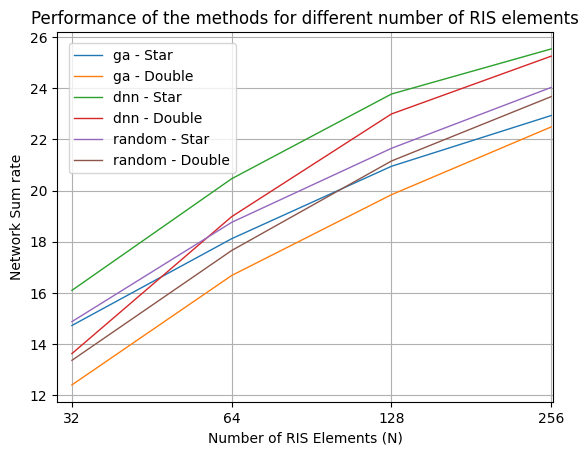

In [ ]:
import matplotlib
metric = 'R'
r_min = 2
p_max = 3
N_id = [32,64,128,256]
d_ids = [832,864,8128,8256]
results = {'ga':{}, 'dnn':{}, 'random':{}}
for key, fname in [('ga', 'GA_N.pkl'), ('dnn', 'dnn_N_300_n.pkl'), ('random', 'random_N_300.pkl')]:
    path = os.path.join(os.getcwd(), 'result', fname)
    with open(path, 'rb') as f:
        results[key] = pickle.load(f)
# d_ids = list(map(get_d_id, [r_min]*len(p_max), p_max))
# d_ids = list(map(get_d_id, r_min, [p_max]*len(r_min)))
for method in ['ga','dnn', 'random']:
    for flag in ['Star', 'Double']:
        y = []
        for d_id in d_ids:
            y.append(results[method][str(d_id)][flag][metric])
        plt.plot(N_id, y,lw = 1, label = f'{method} - {flag}')

# plt.ylim((-0.1, 1.1))
plt.xlim((30, 258))
plt.xlabel('Number of RIS Elements (N)')
plt.ylabel(f'Network Sum rate')
# plt.ylabel(f'Time (s)')
# plt.yscale('log', base = 10)

plt.xscale('log', base = 2)
# matplotlib.scale.LogScale(axis, *, base=10
plt.xticks(N_id, N_id)
# plt.yticks([0,0.2,0.4,0.6,0.8,1])
plt.grid(True)
plt.title(f'Performance of the methods for different number of RIS elements')
plt.legend(bbox_to_anchor=(0.36, 0.97), loc='upper right', borderaxespad=0)
path = os.path.join(os.getcwd(), 'Plots', 'new.png')
bound = matplotlib.transforms.Bbox([[0, 0], [7.3, 3.9]])
plt.savefig(path, transparent = False, bbox_inches = 'tight', dpi = 500)
plt.show()

## Projection dynamics

In [ ]:
def get_stats_p(config, Data, w, phi_t, phi_r, *args):
    if config.star:
        W, Theta_t, Theta_r = get_W_Theta(config, w, phi_t, phi_r, args[0])
    else:
        W, Theta_t, Theta_r = get_W_Theta(config, w, phi_t, phi_r)
    R = rate(config, Data, W, Theta_t, Theta_r, users = True)
    if config.star:
        vio = rate_vio(config, Data, w, phi_t, phi_r, args[0])
    else:
        vio = rate_vio(config, Data, w, phi_t, phi_r)
    return R.sum(-1).mean().item(), vio.sum().item(), (R<config.r_min).any(-1).sum().item()/R.shape[0]

In [ ]:
from Packages.Models.model import V

def project(config, params, Data, w, phi_t, phi_r, *args):
    Stats = {'R': [], 'vio': [], 'vio_percent': []}
    grad_w_p = grad(V, argnums=2)
    grad_phi_t_p = grad(V, argnums = 3)
    grad_phi_r_p = grad(V, argnums = 4)
    if config.star:
        grad_a_p = grad(V, argnums = 5)
    old_step_w = 0
    old_step_phi_r = 0
    old_step_phi_t = 0
    if config.star:
        old_step_a = 0
        a = args[0]
    if config.star:
        r, v, v_p = get_stats_p(config, Data, w, phi_t, phi_r, a)
    else:
        r, v, v_p = get_stats_p(config, Data, w, phi_t, phi_r)
    for k, v in zip(list(Stats.keys()), [r, v, v_p]):
        Stats[k].append(v)
    for i in range(params['num_iter']):

        gr_w = grad_w_p(config, Data, w, phi_t, phi_r, *args)
        gr_phi_t = grad_phi_t_p(config, Data, w, phi_t, phi_r, *args)
        gr_phi_r = grad_phi_r_p(config, Data, w, phi_t, phi_r, *args)
        if config.star:
            gr_a = grad_a_p(config, Data, w, phi_t, phi_r, a)

        new_step_w = params['lr_w']*gr_w + params['momentum_w']*old_step_w
        new_step_phi_t = params['lr_phi_t']*gr_phi_t + params['momentum_phi_t']*old_step_phi_t
        new_step_phi_r = params['lr_phi_r']*gr_phi_r + params['momentum_phi_r']*old_step_phi_r
        if config.star:
            new_step_a = params['lr_a']*gr_a + params['momentum_a']*old_step_a

        phi_r = phi_r - new_step_phi_r
        w = w - new_step_w
        phi_t = phi_t - new_step_phi_t
        if config.star:
            a = a - new_step_a

        old_step_w = new_step_w
        old_step_phi_r = new_step_phi_r
        old_step_phi_t = new_step_phi_t
        if config.star:
            old_step_a = new_step_a
            del gr_a, new_step_a
        del gr_w, gr_phi_r, gr_phi_t, new_step_phi_r, new_step_phi_t, new_step_w

        if config.star:
            r, v, v_p = get_stats_p(config, Data, w, phi_t, phi_r, a)
        else:
            r, v, v_p = get_stats_p(config, Data, w, phi_t, phi_r)
        for k, v in zip(list(Stats.keys()), [r, v, v_p]):
            Stats[k].append(v)
    if config.star:
        return Stats, w, phi_t, phi_r, a
    else:
        return Stats, w, phi_t, phi_r

In [ ]:
p_params = {}
for k, v in [('lr_w', 0.1), ('lr_phi_t', 0.1), ('lr_phi_r', 0.1), ('lr_a', 0.1), ('momentum_phi_t', 0.5), ('momentum_a', 0.5), ('momentum_phi_r', 0.5), ('momentum_w', 0.5), ('num_iter', 100)]:
            p_params[k] = v
p_params['num_iter'] = 300

p_max = 1
r_min = 2.5
d_id = get_d_id(r_min, p_max)
# results = {}
config.dataset_id = str(d_id)
config.update()
config.batch_size = 100
df = create_data_loader(config, 'test')
da = next(iter(df))

for method in ['random', 'dnn']:
    results[method] = {}
    results[method][str(d_id)] = {'Star':{}, 'Double':{}}
    for flag in [True, False]:
        config.star = flag
        if method == 'dnn':
            config.project = False
            config.load_model = True
            config.star = flag
            config.exp_id = str(d_id*10 + (5*(flag)))
            config.P_max = p_max
            config.r_min = r_min
            # set_seed(config)
            # torch.cuda.empty_cache()
            config.model_path = os.path.join(os.getcwd(), 'Dumped', str(config.exp_id), 'Model1', 'best_model_valid.pth')
            model_a = build_model(config)
            model_a.eval()
            if flag:
                w, phi_t, phi_r, a = model_a(da)
            else:
                w, phi_t, phi_r = model_a(da)
        else:
            torch.manual_seed(1)
            if flag:
                N = config.N
            else:
                N = config.N//2
            w = torch.zeros(config.batch_size, 2*config.M*config.K + 1).double()
            phi_t = torch.zeros(config.batch_size, N).double()
            phi_r = torch.zeros(config.batch_size, N).double()
            if config.star:
                a = torch.zeros(config.batch_size, N).double()

            for i in range(config.batch_size):
                phi_t_p = torch.rand(1, N).double()*2*torch.pi
                phi_r_p = torch.rand(1, N).double()*2*torch.pi
                if config.star:
                    temp = torch.rand(1,N)
                    a_p = torch.log(temp/(1-temp)).double()
                w_p = torch.randn(1, 2*config.K*config.M + 1).double()

                w[i, :] = w_p[0,:]
                phi_r[i,:] = phi_r_p[0,:]
                phi_t[i,:] = phi_t_p[0,:]
                if config.star:
                    a[i,:] = a_p[0,:]

        if flag:
            with torch.no_grad():
                stats, w, phi_t, phi_r, a = project(config, p_params, da, w, phi_t, phi_r, a)
        else:
            with torch.no_grad():
                stats, w, phi_t, phi_r = project(config, p_params, da, w, phi_t, phi_r)
        key = 'Star' if flag else 'Double'
        results[method][str(d_id)][key] = stats

In [ ]:
config.exp_id

In [ ]:
path = os.path.join(os.getcwd(), 'result')
name = 'project_300.pkl'
if not os.path.exists(path):
    os.makedirs(path)

with open(os.path.join(path, name), 'wb') as f:
    pickle.dump(results, f)

In [ ]:
len(results['dnn']['8']['Star']['R'])

In [ ]:
results_a = {'ga':{}, 'dnn':{}, 'random':{}}
for key, fname in [('ga', 'GA.pkl'), ('dnn', 'dnn_time_p_300.pkl'), ('random', 'random_p_300.pkl')]:
    path = os.path.join(os.getcwd(), 'result', fname)
    with open(path, 'rb') as f:
        results_a[key] = pickle.load(f)

In [ ]:
results['random']['8']['Star']['R'][-1]

In [ ]:
results_a['random']['8']['Star']['R']

In [ ]:
import matplotlib
metric = 'R'
r_min = 2.5
p_max = 1
d_id = get_d_id(r_min, p_max)

for method in ['dnn', 'random']:
    for flag in ['Star', 'Double']:
        y = results[method][str(d_id)][flag][metric]
        x = list(range(len(y)))
        plt.plot(x, y,lw = 1, label = f'{method} - {flag}')

# plt.ylim((-0.1, 1.1))
plt.xlim((-0.9,301.1))
plt.xlabel('Iterations')
plt.ylabel(f'Network Sum rate')
# plt.ylabel(f'Time (s)')
# plt.ylabel(f'Violation Probability')
# plt.yscale('log')
plt.xticks(list(range(0, 301, 50)))
# plt.yticks([0,0.2,0.4,0.6,0.8,1])
plt.grid(True)
plt.title(f'Performance of the projection for p_max of {p_max} and r_min of {r_min}')
plt.legend(bbox_to_anchor=(0.99, 0.7), loc='upper right', borderaxespad=0)
path = os.path.join(os.getcwd(), 'Plots', 'Proj_R_p_1_r_2.5.png')
bound = matplotlib.transforms.Bbox([[0, 0], [7.3, 3.9]])
plt.savefig(path, transparent = False, bbox_inches = 'tight', dpi = 500)
plt.show()

NameError: ignored

# Data Generation

In [ ]:
config.batch_size = 100
config.mode1 = True
config.epsilon = 10
config.M = 8
config.N = 64
N0_dbm = -170
config.N0 = (10**((N0_dbm - 30)/10))*180*1e3
config.P_max = 1
config.r_min = 2
dtypes = ['train', 'valid', 'test']
seeds = [1,0,100]
num_samples = [int(x) for x in [9e4, 5e3, 5e3]]
batch_size = 100

for dtype, seed, num_data in zip(dtypes, seeds, num_samples):
    path = os.path.join(os.getcwd(), 'Datasets', 'Star' , dtype)
    rng = np.random.RandomState(seed)
    G_all, H_all = generate_feasible_data(config, rng, num_data, batch_size)
    if path == None:
        path = os.path.join(os.getcwd())
    if not os.path.exists(path):
        os.makedirs(path)
    data_path = os.path.join(path, 'data.mat')
    data = {'G': G_all, 'H': H_all}
    savemat(data_path, data)
    def log(params, path):
        path = os.path.join(path, 'info.txt')
        file = open(path, 'w')
        for k, v in params.items():
            file.write(f'{k}: {v}')
            file.write('\n')
        file.close()
    for k, v in [('lr_w', 1), ('lr_phi', 1), ('momentum_phi', 0.5), ('momentum_w', 0.5), ('num_iter', 500)]:
        gd_params[k] = v
    params = {'Data path': data_path, 'Number of datapoints': num_data, 'Seed': seed, \
                'Channel model': 'Rician', 'N0': config.N0, 'P_max': config.P_max,\
             'M': config.M, 'K': config.K, 'epsilon':config.epsilon, 'r_min': config.r_min, 'mode1': config.mode1, **gd_params}
    log(params, path)

# Random Benchmark

In [ ]:
torch.manual_seed(1)
rates = []
vios = []
compute = []
for i in range(config.batch_size):
    data_p = {'H' : da['H'][i,:, :].unsqueeze(0), 'G':  da['G'][i,:, :].unsqueeze(0)}
    R_m = 0
    vio_m = 100
    config.star = True
    limit = 1000
    s = time.time()
    for idx in range(limit):
        var_t = torch.rand(config.N).unsqueeze(0).double()*2*torch.pi
        temp = torch.rand(config.N)
        var_r = torch.log(temp/(1-temp)).unsqueeze(0).double()
        w = torch.randn(2*config.K*config.M + 1).unsqueeze(0).double()
        w[0,0] = torch.log(w[0,0]/(1-w[0,0]))
        W, Theta_t, Theta_r = get_W_Theta(config, w, var_t, var_r, mode1 = config.mode1)

    #     H_t = data_p['H'][:,:,0:2]
    #     H_r = data_p['H'][:,:,2:]

    #     w_t = torch.bmm(H_t.conj().transpose(1, 2), torch.bmm(Theta_t, data_p['G']))
    #     w_r = torch.bmm(H_r.conj().transpose(1, 2), torch.bmm(Theta_r, data_p['G']))

    #     W = torch.cat([w_t, w_r], dim = 1).conj().transpose(1,2)
    #     W = (W/torch.norm(W, dim = (1,2)).reshape(W.shape[0], 1, 1)).unsqueeze(-1)
    #     w = torch.zeros(W.shape[0],  config.M*config.K*2 + 1).double()
    #     w[:,1:] = torch.cat([W.real, W.imag], dim = 3).reshape(W.shape[0], -1)
    #     w[:,0] = 10

    #     W, Theta_t, Theta_r = get_W_Theta(config, w, var_t, var_r, mode1 = config.mode1)

        vio = rate_vio(config, data_p, var_t, var_r, w, mode1 = config.mode1)
        R = rate(config, data_p, Theta_t, Theta_r, W, users = False)
        if vio < vio_m:
            vio_m = vio
            R_m = R
        if vio <= 1e-10:
            R_m = R
            vio_m = vio
            break
        if idx%(limit/2) == 0:
            print(f'{i} --- {idx}  ---- {R_m} ---- {vio_m}')
    e = time.time()
    rates.append(R_m)
    vios.append(vio_m)
    compute.append(e - s)

In [ ]:
mean_rate = torch.mean(torch.tensor(rates)).item()
prob_vio = (torch.tensor(vios) > 1e-6).sum()/len(vios)
mean_vio = torch.mean(torch.tensor(vios)).item()
mean_time = torch.mean(torch.tensor(compute)).item()
print(f'rate: {mean_rate}  --- prob_vio: {prob_vio} --- time: {mean_time} --- QoS vio: {mean_vio}')

# Testing the new approach

In [ ]:
def get_W_Theta_normal(config, w, phi_t, phi_r):
    """
    double notmal RIS
    """
    amp, b = torch.split(w, [1, config.M*config.K*2], dim = 1)
    amp = torch.sigmoid(amp)
    b = b.reshape(-1, config.M, config.K, 2)/torch.norm(b ,2, dim = 1).reshape(b.shape[0], 1, 1, 1)
    W = amp.reshape(amp.shape[0], 1, 1)*(b[:,:,:,0] + 1j*b[:,:,:,1])*config.P_max
    Theta_t = torch.diag_embed(torch.exp(1j*phi_t))
    Theta_r = torch.diag_embed(torch.exp(1j*phi_r))
    return W, Theta_t, Theta_r

def get_W_Theta_star(config, w, phi_t, phi_r, a):
    """
    w: (B, 2KM + 1)   phi_t: (B, N) (output of linear layer)   a: (B, N) (output of linear layer)
    phi_r: (B, N) (output of linear layer)
    """
    amp, b = torch.split(w, [1, config.M*config.K*2], dim = 1)
    amp = torch.sigmoid(amp)
    b = b.reshape(-1, config.M, config.K, 2)/torch.norm(b ,2, dim = 1).reshape(b.shape[0], 1, 1, 1)
    W = amp.reshape(amp.shape[0], 1, 1)*(b[:,:,:,0] + 1j*b[:,:,:,1])*config.P_max

    coef = torch.sigmoid(a)
    a_t = (1 - config.utol)*coef + (1-coef)*(config.ltol)
    a_r = 1 - a_t

    Theta_t = torch.diag_embed(torch.sqrt(a_t)*torch.exp(1j*phi_t))
    Theta_r = torch.diag_embed(torch.sqrt(a_r)*torch.exp(1j*phi_r))
    return W, Theta_t, Theta_r

In [ ]:
def rate_vio_p(config, Data, phi_t, phi_r, w, *args):
    if config.star:
        a = args[0]
        W, Theta_t, Theta_r = get_W_Theta_star(config, w, phi_t, phi_r, a)
    else:
        W, Theta_t, Theta_r = get_W_Theta_normal(config, w, phi_t, phi_r)

    R = rate(config, Data, W, Theta_t, Theta_r, users = True)

    with torch.no_grad():
        x = F.relu(config.r_min - R)
        y = torch.linalg.norm(x, ord = 2, dim = 1)**2
        s = torch.heaviside(-(y-1e-3), values = torch.tensor(1).double().to(config.device))
    return (1-s)*((F.relu(torch.exp(config.r_min - R) -1)).sum(-1)) + s*((torch.exp(config.r_min - R) -1).sum(-1))

def V(config, Data, phi_t, phi_r, w, *args):

    return rate_vio_p(config, Data, phi_t, phi_r, w, *args).sum()

grad_w_p = grad(V, argnums=4)
grad_phi_t_p = grad(V, argnums = 2)
grad_phi_r_p = grad(V, argnums = 3)
if config.star:
    grad_a_p = grad(V, argnums = 5)

def project(config, params, Data, phi_t, phi_r, w, *args):
    old_step_w = 0
    old_step_phi_r = 0
    old_step_phi_t = 0
    if config.star:
        old_step_a = 0
        a = args[0]
    for i in range(params['num_iter']):

        gr_w = grad_w_p(config, Data, phi_t, phi_r, w, *args)
        gr_phi_t = grad_phi_t_p(config, Data, phi_t, phi_r, w, *args)
        gr_phi_r = grad_phi_r_p(config, Data, phi_t, phi_r, w, *args)
        if config.star:
            gr_a = grad_a_p(config, Data, phi_t, phi_r, w, a)

        new_step_w = params['lr_w']*gr_w + params['momentum_w']*old_step_w
        new_step_phi_t = params['lr_phi_t']*gr_phi_t + params['momentum_phi_t']*old_step_phi_t
        new_step_phi_r = params['lr_phi_r']*gr_phi_r + params['momentum_phi_r']*old_step_phi_r
        if config.star:
            new_step_a = params['lr_a']*gr_a + params['momentum_a']*old_step_a

        phi_r = phi_r - new_step_phi_r
        w = w - new_step_w
        phi_t = phi_t - new_step_phi_t
        if config.star:
            a = a - new_step_a

        old_step_w = new_step_w
        old_step_phi_r = new_step_phi_r
        old_step_phi_t = new_step_phi_t
        if config.star:
            old_step_a = new_step_a
    if config.star:
        return w, phi_t, phi_r, a
    else:
        return w, phi_t, phi_r

In [ ]:
# inits
torch.manual_seed(1)
phi_t = torch.rand(config.batch_size, config.N).double()*2*torch.pi
phi_r = torch.rand(config.batch_size, config.N).double()*2*torch.pi
temp = torch.rand(config.batch_size,config.N)
a = torch.log(temp/(1-temp)).double()
w = torch.randn(config.batch_size, 2*config.K*config.M + 1).double()
p_max = config.P_max*torch.ones(config.batch_size).double()

In [ ]:
def loss(config, in_params, Data, phi_t, phi_r, w, *args):
    if config.star:
        w_p, phi_t_p, phi_r_p, a_p = project(config, in_params, Data, phi_t, phi_r, w, *args)
        W, Theta_t, Theta_r = get_W_Theta_star(config, w_p, phi_t_p, phi_r_p, a_p)
    else:
        w_p, phi_t_p, phi_r_p = project(config, in_params, Data, phi_t, phi_r, w, *args)
        W, Theta_t, Theta_r = get_W_Theta_normal(config, w_p, phi_t_p, phi_r_p)

    R = rate(config, Data, Theta_t, Theta_r, W, users = True)
    r = R.sum(-1)
    with torch.no_grad():
        x = F.relu(config.r_min - R)
        y = torch.linalg.norm(x, ord = 2, dim = 1)**2
        s = torch.heaviside(-(y-1e-3), values = torch.tensor(1).double().to(config.device))
    vio = config.gamma*((1-s)*((F.relu(torch.exp(config.r_min - R) -1)).sum(-1))) + s*((torch.exp(config.r_min - R) -1).sum(-1))
    score = -1*(r) + vio
    return score.mean()

In [ ]:
grad_w = grad(loss, argnums=5)
grad_phi_t = grad(loss, argnums = 3)
grad_phi_r = grad(loss, argnums = 4)
if config.star:
    grad_a = grad(loss, argnums = 6)

In [ ]:
def meta_project(config, meta_params, in_params, opt_vars, Data, phi_t, phi_r, w, *args, verbose = False):
    old_step_w = 0
    old_step_phi_r = 0
    old_step_phi_t = 0
    if config.star:
        old_step_a = 0
        a = args[0]
    stats = []
    stats.append(loss(config, in_params, Data, phi_t, phi_r, w, *args).item())
    for i in range(meta_params['num_iter']):
        if 'w' in opt_vars:
            gr_w = grad_w(config, in_params, Data, phi_t, phi_r, w, *args)
            new_step_w = meta_params['lr_w']*gr_w + meta_params['momentum_w']*old_step_w
            w = w - new_step_w
            old_step_w = new_step_w
        if 'phi_t' in opt_vars:
            gr_phi_t = grad_phi_t(config, in_params, Data, phi_t, phi_r, w, *args)
            new_step_phi_t = meta_params['lr_phi_t']*gr_phi_t + meta_params['momentum_phi_t']*old_step_phi_t
            phi_t = phi_t - new_step_phi_t
            old_step_phi_t = new_step_phi_t

        if 'phi_r' in opt_vars:
            gr_phi_r = grad_phi_r(config, in_params, Data, phi_t, phi_r, w, *args)
            new_step_phi_r = meta_params['lr_phi_r']*gr_phi_r + meta_params['momentum_phi_r']*old_step_phi_r
            phi_r = phi_r - new_step_phi_r
            old_step_phi_r = new_step_phi_r

        if 'a' in opt_vars and config.star:
            gr_a = grad_a(config, in_params, Data, phi_t, phi_r, w, a)
            new_step_a = meta_params['lr_a']*gr_a + meta_params['momentum_a']*old_step_a
            a = a - new_step_a
            old_step_a = new_step_a

#         if 'r_min' in opt_vars:
#             gr_r_min = grad_r_min(config, in_params, Data, var_t, var_r, w, r_min, p_max)
#             new_step_r_min = meta_params['lr_r_min']*gr_r_min + meta_params['momentum_r_min']*old_step_r_min
#             r_min = r_min - new_step_r_min
#             old_step_r_min = new_step_r_min

#         if 'p_max' in opt_vars:
#             gr_p_max = grad_p_max(config, in_params, Data, var_t, var_r, w, r_min, p_max)
#             new_step_p_max = meta_params['lr_p_max']*gr_p_max + meta_params['momentum_p_max']*old_step_p_max
#             p_max = p_max - new_step_p_max
#             old_step_p_max = new_step_p_max

        l2 = loss(config, in_params, Data, phi_t, phi_r, w, *args).item()
        stats.append(l2)
        if i%20 == 0:
            if verbose:
                print(l2)

    if config.star:
        return w, phi_t, phi_r, a, stats
    else:
        return w, phi_t, phi_r, stats

In [ ]:
in_params = {}
for k, v in [('lr_w', 0.1), ('lr_phi_t', 0.1), ('lr_phi_r', 0.1), ('lr_a', 0.1), ('momentum_phi_t', 0.5), ('momentum_a', 0.5), ('momentum_phi_r', 0.5), ('momentum_w', 0.5), ('num_iter', 100)]:
            in_params[k] = v
in_params['num_iter'] = 10

meta_params = {}
for k, v in [('lr_w', 0.1), ('lr_phi_t', 0.1), ('lr_phi_r', 0.1), ('lr_a', 0.1),('momentum_phi_t', 0.5), ('momentum_phi_r', 0.5), ('momentum_a', 0.5), ('momentum_w', 0.5), ('num_iter', 100)]:
            meta_params[k] = v
meta_params['num_iter'] = 100

In [ ]:
#var_t
opt_vars = ['w', 'phi_r', 'phi_t', 'a']
config.gamma = 1
config.star = False
w_n, phi_t_n, phi_r_n, stats = meta_project(config, meta_params, in_params, opt_vars, da, phi_t, phi_r, w, verbose = True)

In [ ]:
s = time.time()
in_params['num_iter'] = 500
w_p, phi_t_p, phi_r_p = project(config, in_params, da, phi_t_n, phi_r_n, w_n)
# W, Theta_t, Theta_r = get_W_Theta_star(config, w_p, phi_t_p, phi_r_p, a_p)
W, Theta_t, Theta_r = get_W_Theta_normal(config, w_p, phi_t_p, phi_r_p)
R = rate(config, da, Theta_t, Theta_r, W, users = True)
# vio = rate_vio(config, da, phi_t_p, var_r_p, w_p, mode1 = config.mode1)
e = time.time()
print(f'{(e - s)/config.batch_size}')

In [ ]:
vio.sum()

In [ ]:
(vio<=0).sum()/config.batch_size

In [ ]:
R.sum(-1).mean()